[Back to Lecture Overview](Overview.ipynb)

# Dictionaries in Python
* Author: Johannes Maucher
* Last Update: 03.07.2019

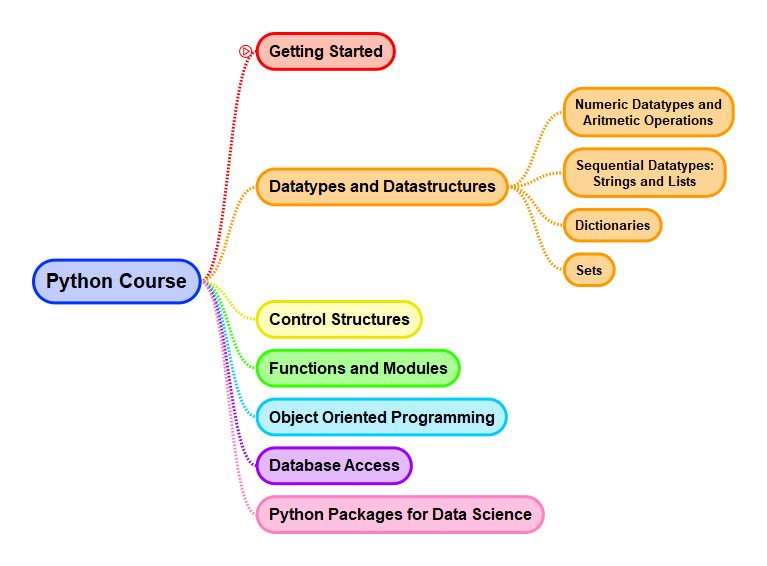

In [3]:
from IPython.display import Image
Image(filename="../../Pics/DS_Python_Datatypes_All.png")

Assume that a set of persons shall be described by their name, age, gender and hometown. One option to model this information in Python is to allocate for each person a list, which contains the mentioned parameters as components. Sets of persons could then be modelled as lists of lists.  

In [4]:
p1=['Bob',27,'Male','Ulm']
print(p1)
p2=['Mary',23,'Female','Berlin']
print(p2)
persons=[p1,p2]
print(persons)

['Bob', 27, 'Male', 'Ulm']
['Mary', 23, 'Female', 'Berlin']
[['Bob', 27, 'Male', 'Ulm'], ['Mary', 23, 'Female', 'Berlin']]


If a certain parameter, e.g. hometown, shall be queried, it must be known at which index of the person-vector this parameter is stored. This is a drawback, in particular, if there are much more parameters/components in the lists. It would be nice if parameter-values can be queried by the name of the parameter (not an integer, which indicates the position). This feature is provided by the Python datatype `dictionary`. A dictionary is a mapping from keys to corresponding values, in the same way as a list is a mapping from an integer-index to a corresponding value. Keys in dictionaries are usually meaningful names.   

## Defining Dictionaries
The same information as modelled with lists in the example above is now modelled with dictionaries. An empty dictionary is defined by curly brackets

```
myDict={}
``` 
or by

```
myDict=dict()
```

Non-empty dictionaries contain within the curly brackets an arbitrary number of *key-value-pairs*. These pairs are separated by commas. Keys and values are separated by a colon: 

```
myDict={key1:value1,key2:value2,key3:value3}
``` 
If `dict()` is applied, then keys and values are separated by `=` as shown in the following example:

In [5]:
pd1={'name':'Bob','age':27,'gender':'Male','hometown':'Ulm'}
print(pd1)
#pd2={'name':'Mary','age':23,'gender':'Female','hometown':'Berlin'}
pd2=dict(name='Mary',age=23,gender='Female',hometown='Berlin')
print(pd2)
personsD=[pd1,pd2]
print(personsD)

{'name': 'Bob', 'age': 27, 'gender': 'Male', 'hometown': 'Ulm'}
{'name': 'Mary', 'age': 23, 'gender': 'Female', 'hometown': 'Berlin'}
[{'name': 'Bob', 'age': 27, 'gender': 'Male', 'hometown': 'Ulm'}, {'name': 'Mary', 'age': 23, 'gender': 'Female', 'hometown': 'Berlin'}]


Keys are usually integers, characters or strings. Values can be of arbitrary type, e.g. strings, lists, dictionaries, etc. In the following example a nested dictionary is defined, whose values are again dictionaries. In this example another option for defining dictionaries is shown: First an empty dictionary is created. Then keys are implicitely defined by writing their names in square-brackets and assigning values:

In [6]:
company={}
company['ceo']=pd1 #create key and assign value
company['cfo']=pd2 #create key and assign value
print(company)

{'ceo': {'name': 'Bob', 'age': 27, 'gender': 'Male', 'hometown': 'Ulm'}, 'cfo': {'name': 'Mary', 'age': 23, 'gender': 'Female', 'hometown': 'Berlin'}}


A frequent use-case in the context of dictionaries is to query if a certain key already exists. If this is not the case, then a default-value should be assigned to the key. In Python this routine is implemented in the dictionary's `setdefault(k,x)`-method. If the key `k` already exists the method returns the corresponding value, otherwise a new-key value pair `k:x` is created:

In [7]:
company.setdefault('cto','NN')
print(company)

{'ceo': {'name': 'Bob', 'age': 27, 'gender': 'Male', 'hometown': 'Ulm'}, 'cfo': {'name': 'Mary', 'age': 23, 'gender': 'Female', 'hometown': 'Berlin'}, 'cto': 'NN'}


## Accessing keys and values
The number of key-value-pairs in a dictionary can be obtained by the `len(dictname)`-method. E.g.

In [8]:
print(len(company))
print(len(company['ceo']))

3
4


A list of all keys and a list of all values of a dictionary can be queried by the `dict.keys()` and `dict.values()` functions, respectively:

In [9]:
print("Keys:\n",list(company.keys()))
print("Values:\n",list(company.values()))

Keys:
 ['ceo', 'cfo', 'cto']
Values:
 [{'name': 'Bob', 'age': 27, 'gender': 'Male', 'hometown': 'Ulm'}, {'name': 'Mary', 'age': 23, 'gender': 'Female', 'hometown': 'Berlin'}, 'NN']


A list of all key-value-pairs is returned by the `dict.items()' function:

In [10]:
print(list(company.items()))

[('ceo', {'name': 'Bob', 'age': 27, 'gender': 'Male', 'hometown': 'Ulm'}), ('cfo', {'name': 'Mary', 'age': 23, 'gender': 'Female', 'hometown': 'Berlin'}), ('cto', 'NN')]


A value for a given key can be obtained by writing the key-name in square brackets:

In [11]:
company['ceo']

{'name': 'Bob', 'age': 27, 'gender': 'Male', 'hometown': 'Ulm'}

## Modifying Dictionaries
As already mentioned above the assignment
```
myDict[key1]=value1
```
creates a new key and assigns the corresponding value. If the key already exists, a new value is assigned to this key.  

The method 
```
dict.copy()
```
creates a shallow copy of the dictionary. 

All items (=key-value-pairs) are removed from the dictionary by 
```
dict.clear()
```
and a single key-value pair can be removed by `del d[k]`, where `k` is the key of the pair, which shall be removed.

In [12]:
print(len(company))
del company['cto']
print(len(company))

3
2


A comprehensive list of all methods applicable for dictionaries is available at the [official Python documentation](https://docs.python.org/2.7/library/stdtypes.html#mapping-types-dict). 

## Persistently Save Dictionaries
For dictionaries, which shall be saved persistently and later be loaded into a program again, the .json file-format is suitable, since the original structure of the dictionary is restored. This is demonstrated in the following code cells:

In [13]:
company

{'ceo': {'name': 'Bob', 'age': 27, 'gender': 'Male', 'hometown': 'Ulm'},
 'cfo': {'name': 'Mary', 'age': 23, 'gender': 'Female', 'hometown': 'Berlin'}}

In [14]:
import json

### Write Dictionary to file

In [17]:
with open("companyFile.json","w") as f:
    json.dump(company,f)

### Read Dictionary from .json File

In [18]:
with open("companyFile.json","r") as f:
    mycompany=json.load(f)
mycompany

{'ceo': {'name': 'Bob', 'age': 27, 'gender': 'Male', 'hometown': 'Ulm'},
 'cfo': {'name': 'Mary', 'age': 23, 'gender': 'Female', 'hometown': 'Berlin'}}